<a href="https://colab.research.google.com/github/Matheusnovo/games-data-science/blob/main/MVP_Matheus_Monteiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

Neste caso, não tenho um problema em si a resolver, meu objetivo foi escolher um dataset com dados baseado no meu gosto pessoal e unir o útil ao agradável no decorrer deste MVP. Sempre gostei muito de video games e dando uma olhada no Kaggle, me deparei com o dataset Video Game Sales e decidi então fazer uma análise sobre ele e tentar extrair o máximo de informação que eu conseguir e que eu achava interessante.

Respondendo sobre ser um problema de aprendizado supervisionado ou não, entendo que seja não supervisionado, pois procuro encontrar padrões nos dados apresentados e não prever dados futuros.

Sobre premissas ou hipóteses que tenho sobre o assunto, a principal hipótese é que a plataforma dos jogos tem um impacto direto nas vendas, ou seja, jogos lançados em consoles populares vendem mais. Outra hipótese é que o gênero do jogo também influencia bastante nas vendas, gêneros como ação e esportes tendem a ser mais lucrativos. Além disso, o ano de lançamento pode afetar as vendas, com jogos mais recentes vendendo mais devido à melhor tecnologia e marketing. E, claro, diferenças regionais (como preferência de jogos no Japão vs. América do Norte) também podem influenciar o sucesso de um título.

Quanto as restrições ou condições para a seleção desses dados: Os dados provavelmente estão restritos a jogos que têm informações públicas disponíveis sobre suas vendas, o que pode excluir títulos menores ou lançamentos muito recentes. Além disso, o período de tempo dos dados pode ser limitado, então jogos mais antigos ou muito novos podem não estar incluídos. Também, dependendo do foco da análise, as vendas podem estar divididas por região (América do Norte, Japão, etc.), o que pode deixar alguns mercados sub ou super representados. Por fim, o tratamento de jogos lançados em múltiplas plataformas pode ser uma condição importante para evitar distorções nas análises.

Como já dito acima, o dataset escolhido foi o Video Game Sales que se encontra no kaggle, segue abaixo o link:
https://www.kaggle.com/datasets/gregorut/videogamesales

Este conjunto de dados contém uma lista de videogames com vendas superiores a 100.000 cópias.

**Campos do dataset:**

*   Rank - Classificação das vendas gerais
*   Name - O nome do jogo
*   Platform - Plataforma de lançamento do jogo (por exemplo, PC, PS4, etc.)
*   Year - Ano de lançamento do jogo
*   Genre - Gênero do jogo
*   Publisher - Editora do jogo
*   NA_Sales - Vendas na América do Norte (em milhões)
*   EU_Sales - Vendas na Europa (em milhões)
*   JP_Sales - Vendas no Japão (em milhões)
*   Other_Sales - Vendas no resto do mundo (em milhões)
*   Global_Sales - Total de vendas mundiais








Importando algumas bibliotecas para usar no decorrer do código.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Importando dataset escolhido do meu repositório no Github

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Matheusnovo/games-data-science/refs/heads/main/vgsales.csv', encoding='utf-8')

In [3]:
dataset.shape

(16598, 11)

Podemos perceber que o dataset tem 16598 linhas e 11 colunas.

In [4]:
dataset.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


O código acima mostra os tipos de dados que temos no dataset para poder ter um entendimento melhor de como manipular as informações.

In [5]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


No código acima vemos as primeiras linhas do dataset.

In [6]:
dataset.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


O dataset contém 271 registros faltantes no campo Year e 58 no campo Publisher, preciso tratar esses casos para não ter uma análise equivocada no futuro.

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


Com o código acima podemos ter um resumo estatístico, ajudando a entender a dispersão e a distribuição dos dados.

Agora precisamos verificar a distribuição de cada atributo.
Abaixo eu crio um gráfico de barras para cada atributo numérico do meu dataset.

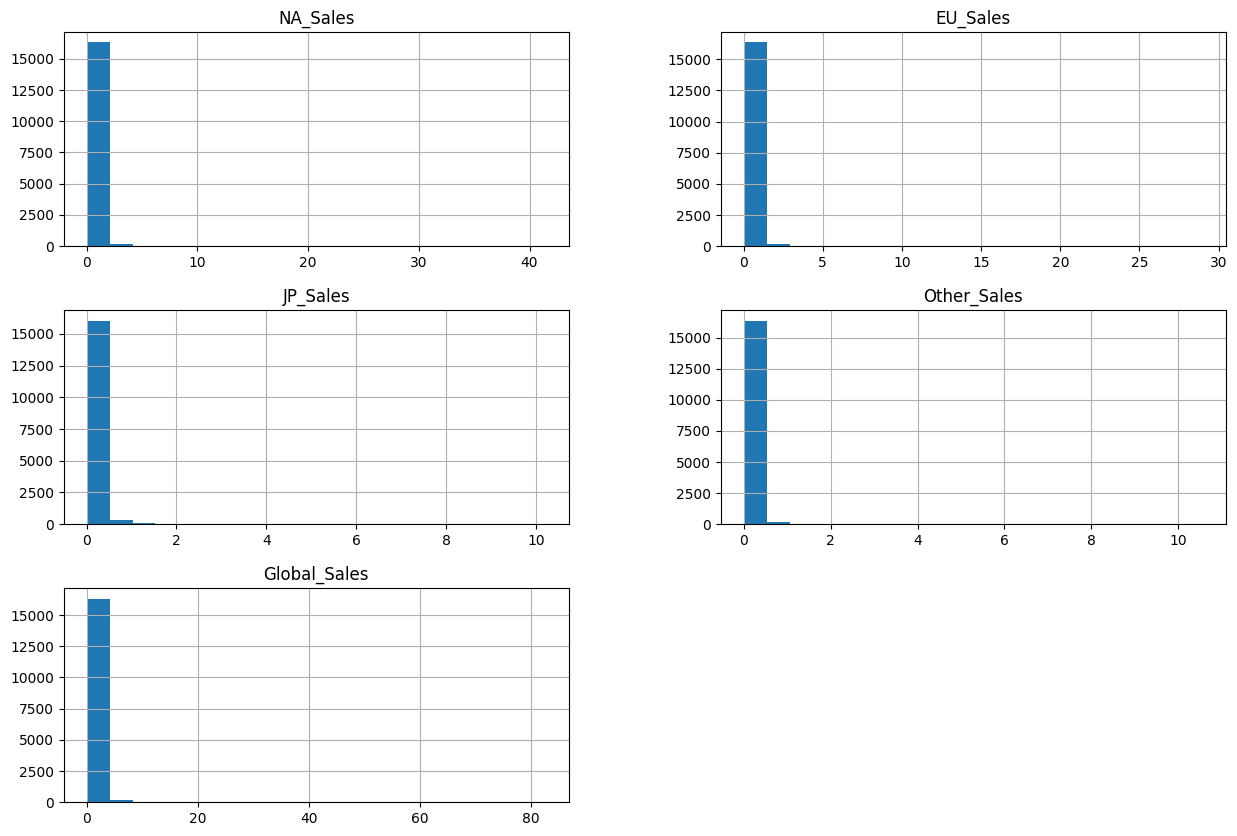

In [14]:
dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].hist(bins=20, figsize=(15,10))
plt.show()

Abaixo crio um gráfico de barras para o atributo categórico Platform.

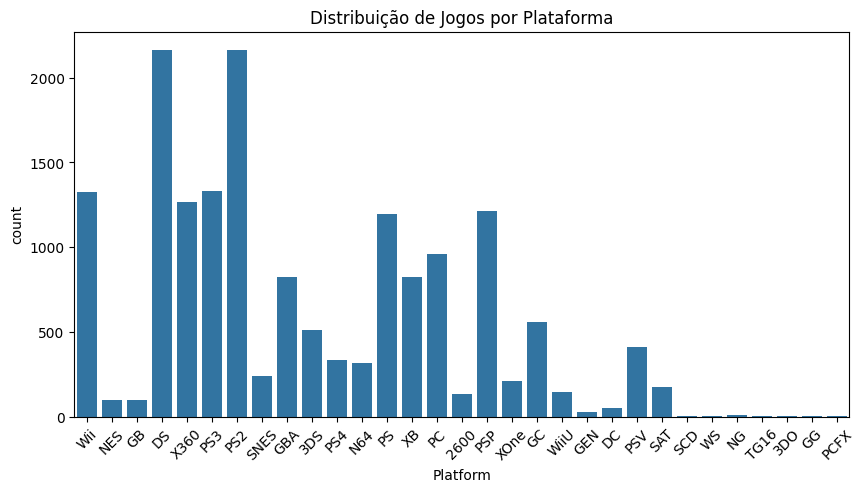

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Platform', data=dataset)
plt.title('Distribuição de Jogos por Plataforma')
plt.xticks(rotation=45)
plt.show()

Em uma breve olhada no gráfico perceber que as plataformas que tiveram mais vendas fora PS2 e o Nintendo DS e as menores SCD, WS, NG, TG16, 3DO, GG e PCFX.

Abaixo crio um gráfico de barras para o atributo categórico Genre.

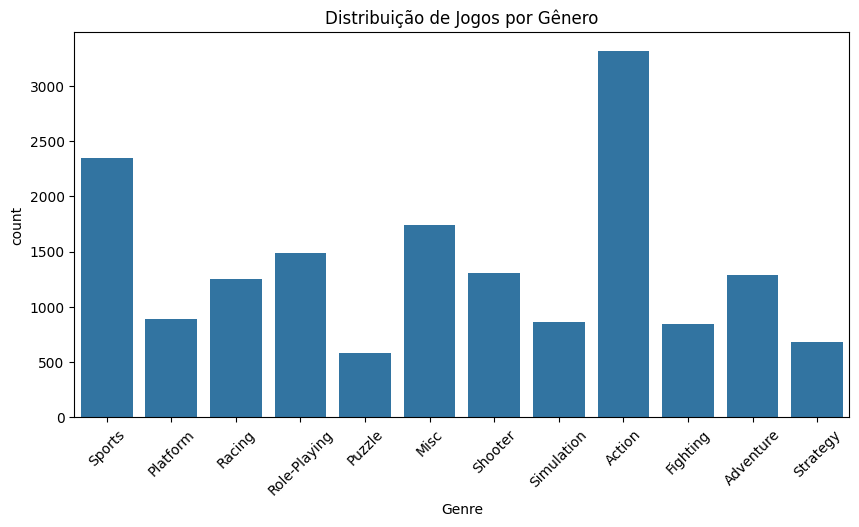

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genre', data=dataset)
plt.title('Distribuição de Jogos por Gênero')
plt.xticks(rotation=45)
plt.show()

Podemos perceber que os games com mais vendas são do gênero Ação e os menos vendas o gênero Puzzle.

Agora vamos fazer uma análise combinada de atributos.
Primeiro vamos verificar a relação de Vendas Globais por Plataformas.

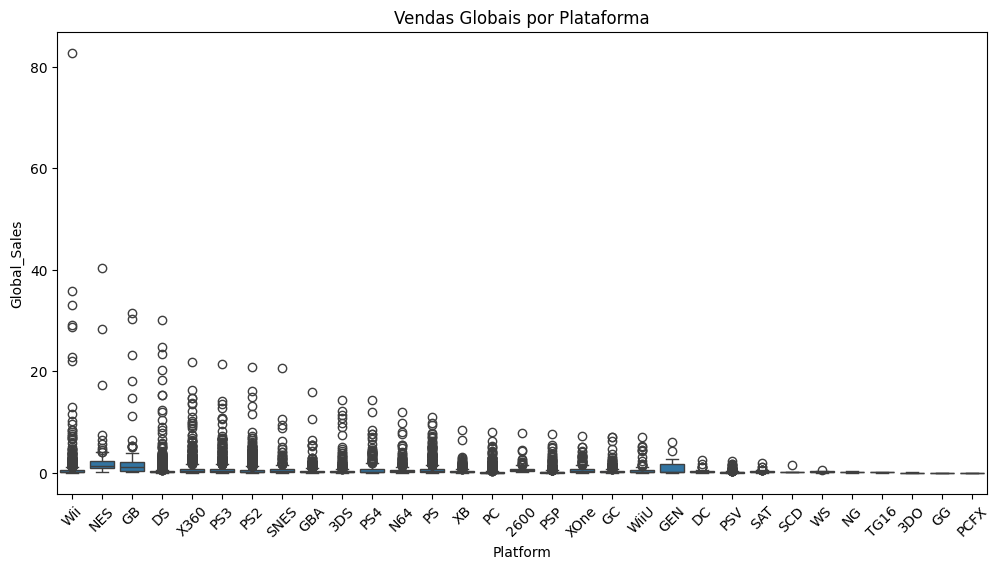

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Platform', y='Global_Sales', data=dataset)
plt.title('Vendas Globais por Plataforma')
plt.xticks(rotation=45)
plt.show()

O gráfico ficou um pouco dificíl de visualizar então fiz uma rotação para melhorar logo abaixo:

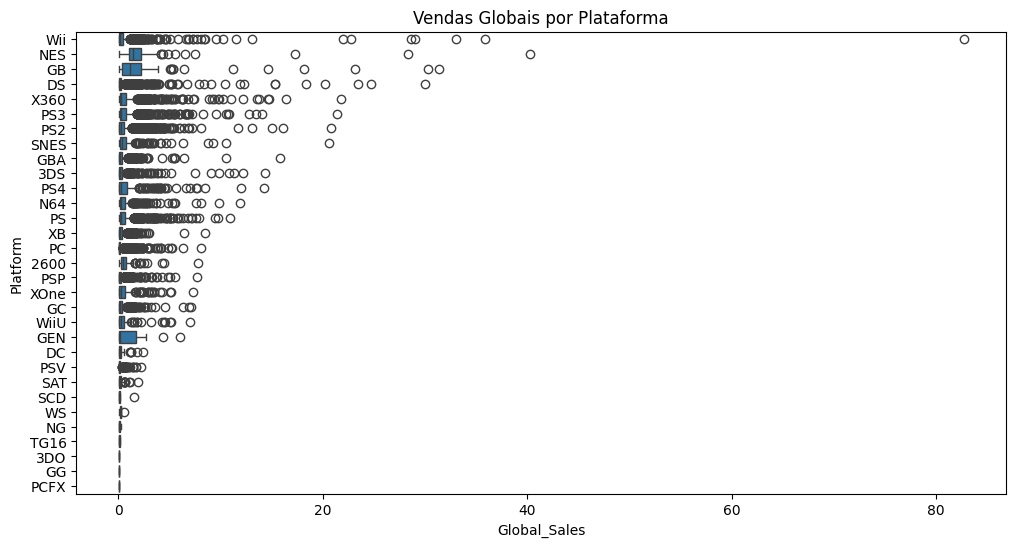

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Platform', x='Global_Sales', data=dataset)
plt.title('Vendas Globais por Plataforma')
plt.show()

Visto que a visualização dos dados não é muito boa, resolvi separar os dados e criar 3 gráficos separadamente para uma melhor análise.

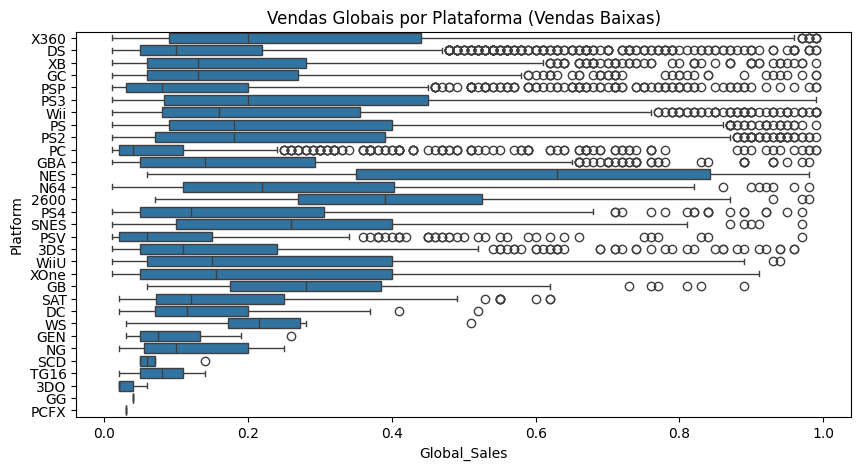

In [19]:
# Vendas globais menores que 1 milhão
low_sales = dataset[dataset['Global_Sales'] < 1]
# Entre 1 e 5 milhões
mid_sales = dataset[(dataset['Global_Sales'] >= 1) & (dataset['Global_Sales'] < 5)]
# Vendas globais maiores que 5 milhões
high_sales = dataset[dataset['Global_Sales'] >= 5]
plt.figure(figsize=(10, 5))
sns.boxplot(y='Platform', x='Global_Sales', data=low_sales)
plt.title('Vendas Globais por Plataforma (Vendas Baixas)')
plt.show()

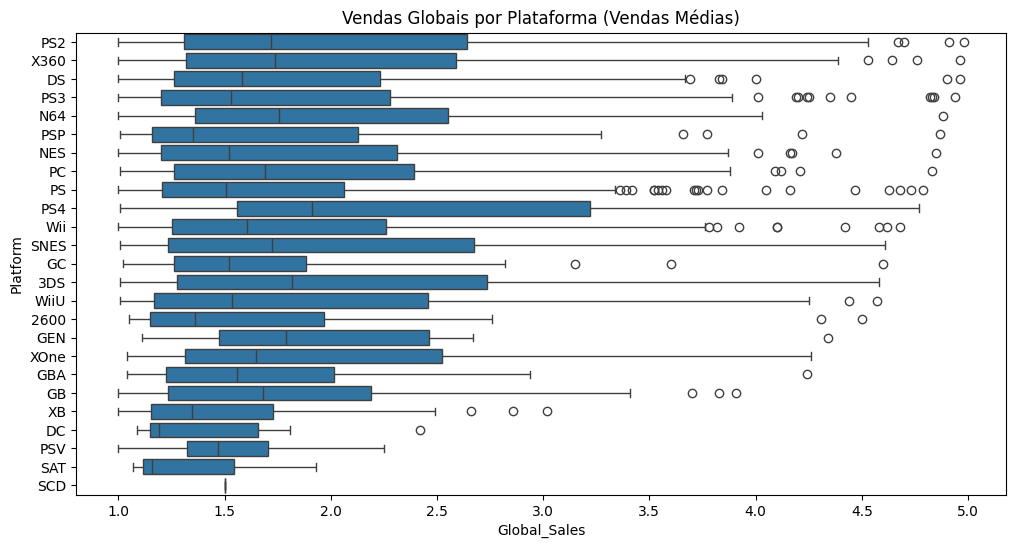

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Platform', x='Global_Sales', data=mid_sales)
plt.title('Vendas Globais por Plataforma (Vendas Médias)')
plt.show()

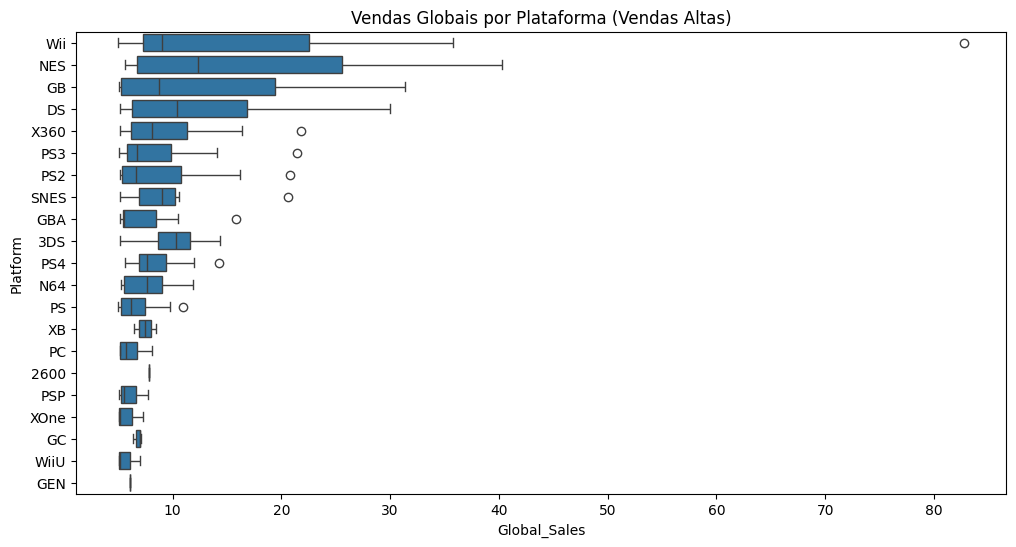

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Platform', x='Global_Sales', data=high_sales)
plt.title('Vendas Globais por Plataforma (Vendas Altas)')
plt.show()

Podemos perceber que as plataformas com as caixas muito pequenas têm pouca variabilidade nas vendas e as caixas maiores indicam que os jogos têm um desempenho mais variado. Podemos notar também a quantidade de outliers em cada plataforma.

Agora vamos verificar a relação de Vendas Globais por Gênero.

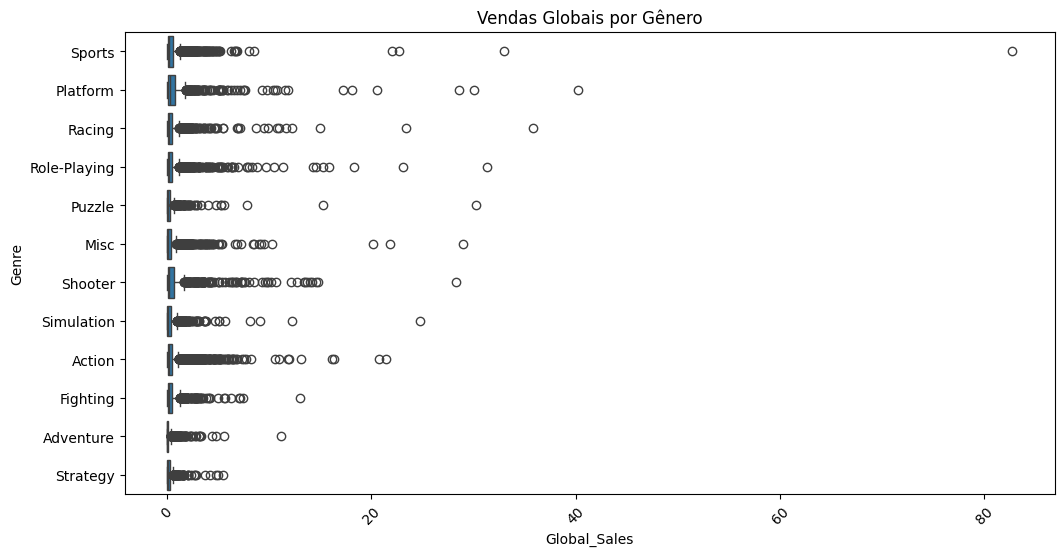

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Genre', x='Global_Sales', data=dataset)
plt.title('Vendas Globais por Gênero')
plt.xticks(rotation=45)
plt.show()

Como dito no início do projeto, não temos de fato uma definição de problema, por isso vamos fazer algumas análises e retirar algumas informações deste dataset.

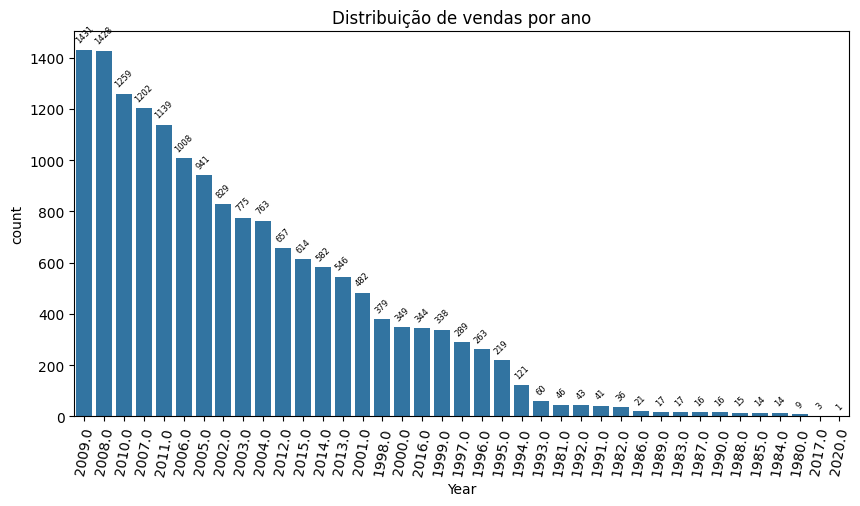

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Year", data=dataset, order = dataset.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.title('Distribuição de vendas por ano')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points',
                rotation=45)
plt.xticks(rotation=80)
plt.show()



Os anos com maiores vendas foram 2009 e 2008 e os menores 2017 e 2020. Neste caso este dataset contém dados mais consistentes até 2016, não quer dizer que 2017 e 2020 realmente tiveram menos vendas, mas sim que nesses anos só foram inseridos essa quantidade de informação no dataset.

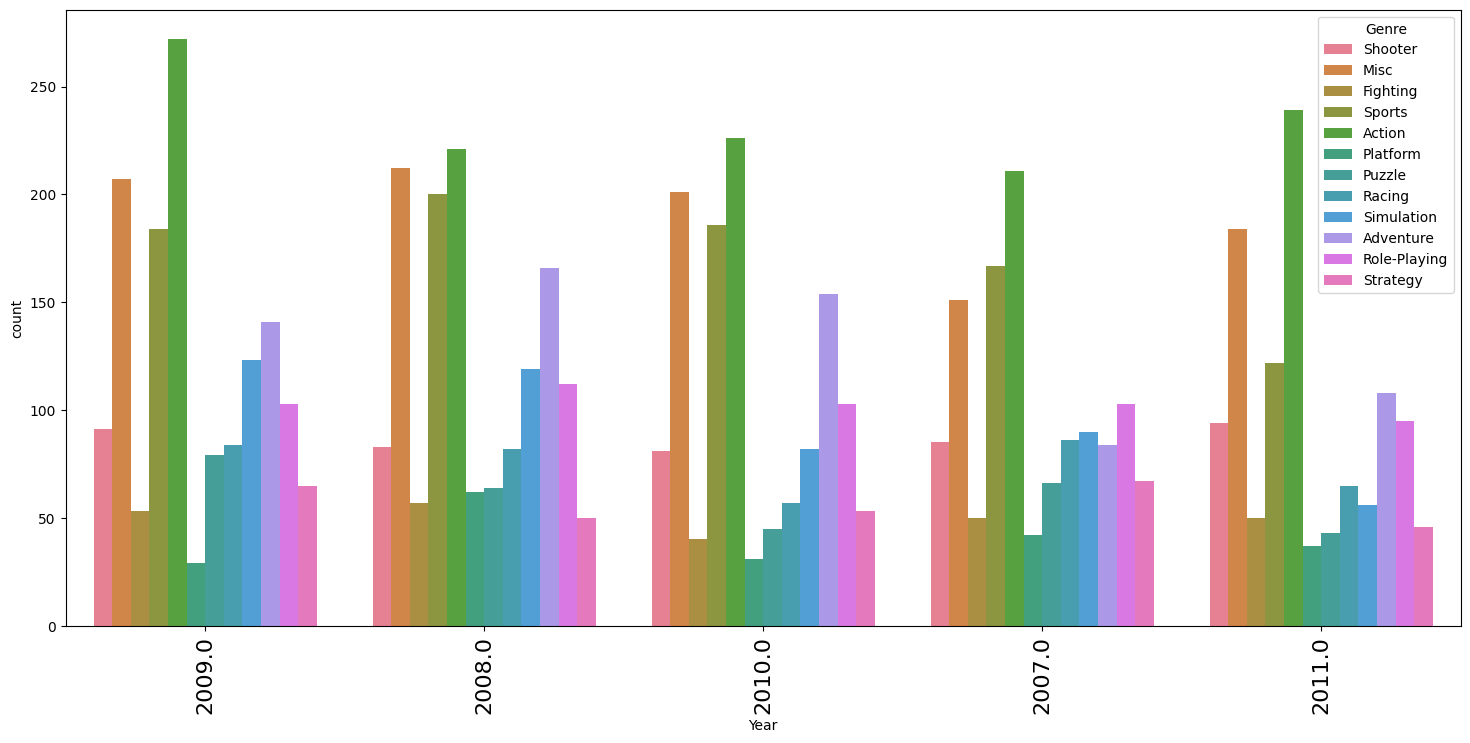

In [30]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Year", data=dataset, hue='Genre', order=dataset.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)
plt.show()

Neste gráfico podemos ver os 5 anos que mais venderam jogos e seus respectivos gêneros.

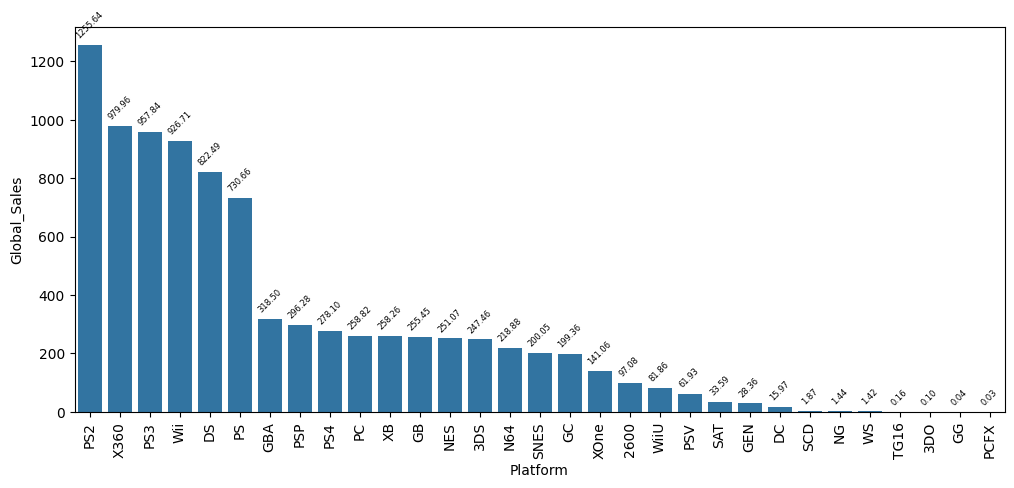

In [31]:
data_platform = dataset.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5),
                textcoords = 'offset points',
                rotation=45)
plt.xticks(rotation=90)
plt.show()

Podemos notar qual plataforma tem o maior número de vendas globlal.

Agora faremos um gráfico Heatmap para comparar as vendas por gênero de jogo.

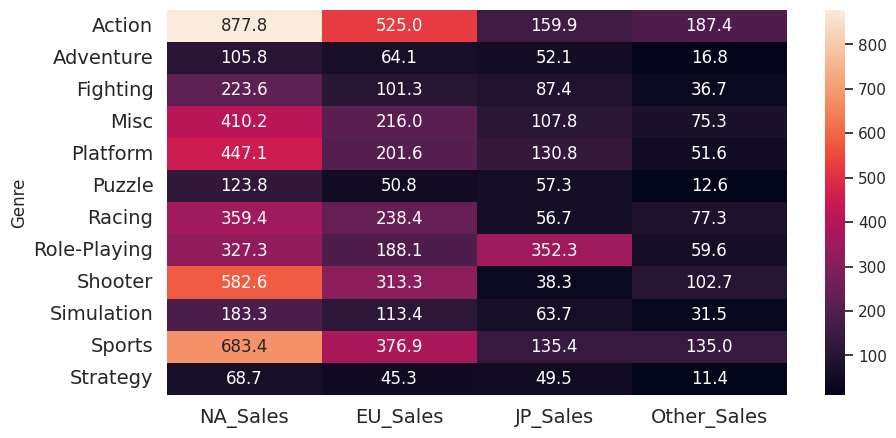

In [32]:
comp_genre = dataset[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Agora faremos uma porcentagem total de vendas por região.

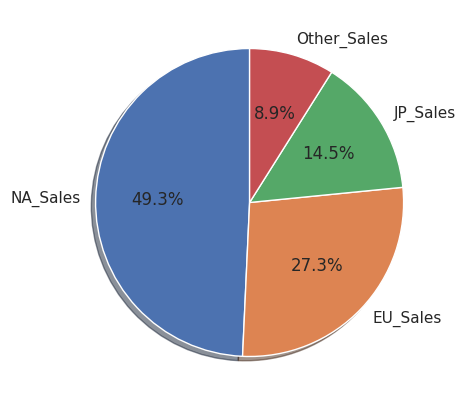

In [33]:
top_sale_reg = dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


Podemos ver quer quase metade das jogos são vendidos na América do Norte e quase 30% na Europa.

Farei uma cópia do dataset original sem alterações.

In [34]:
col = list(dataset.columns)
new_dataset = dataset[col[:]]
new_dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Agora vamos começar o pré-processamento de dados.
Mediante aos passos anteriores podemos começar tratando os valores nulos das colunas Year e Publisher.
No código abaixo vou preencher os valores nulos da coluna Year com a mediana e a coluna Publisher com a categoria "Desconhecido".

In [35]:
new_dataset['Year'].fillna(new_dataset['Year'].median(), inplace=True)
new_dataset['Publisher'].fillna('Desconhecido', inplace=True)

Agora vamos verificar se realmente não temos mais valores nulos no dataset.

In [36]:
new_dataset.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Agora vou aplicar a normalização dos atributos numéricos, que neste caso são a colunas de vendas: NA_Sales, EU_Sales, JP_Sales, Other_Sales e Global_Sales

In [38]:
scaler = MinMaxScaler()
new_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = scaler.fit_transform(new_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
new_dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,1.000000,1.000000,0.368885,0.800378,1.000000
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.700892,0.123363,0.666341,0.072848,0.486281
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.382020,0.443832,0.370841,0.313150,0.432854
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.379610,0.379394,0.320939,0.280038,0.398767
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.271632,0.306340,1.000000,0.094607,0.379064


Agoro vamos aplicar o one-hot encoding para as variáveis categóricas Platform, Genre e Publisher.

In [39]:
categorical_cols = ['Platform', 'Genre', 'Publisher']
numerical_cols = ['Rank', 'Year', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Inicializar o OneHotEncoder
onehotencoder = OneHotEncoder(drop='first', sparse_output=False)

# Usar o ColumnTransformer para aplicar o OneHotEncoder apenas às colunas categóricas
ct = ColumnTransformer(transformers=[('encoder', onehotencoder, categorical_cols)],
                       remainder='passthrough')  # 'remainder=passthrough' mantém as colunas numéricas

# Aplicar a transformação
df_encoded = ct.fit_transform(new_dataset)

# Converter o resultado para um DataFrame para melhor visualização
df_encoded = pd.DataFrame(df_encoded)

# Exibir as primeiras linhas do DataFrame transformado
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,Wii Sports,2006.0,1.0,1.0,0.368885,0.800378,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,Super Mario Bros.,1985.0,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,Mario Kart Wii,2008.0,0.38202,0.443832,0.370841,0.31315,0.432854
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,Wii Sports Resort,2009.0,0.37961,0.379394,0.320939,0.280038,0.398767
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5,Pokemon Red/Pokemon Blue,1996.0,0.271632,0.30634,1.0,0.094607,0.379064


Com isso, nosso dataset fica preparado para uma possível implementação de alguns algorítmos de previsão.